In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
import pickle
import warnings
warnings.filterwarnings("ignore")
import plotly.express as px
from pandas_profiling import ProfileReport as pr

In [2]:
df = pd.read_csv("Train.csv")
df

City  Location_Score  Internal_Audit_Score  External_Audit_Score  \
0       2           8.032                    14                     8   
1      31          77.730                     8                     3   
2      40          59.203                     3                    12   
3      12          73.080                     4                     5   
4       4          15.666                    13                    15   
..    ...             ...                   ...                   ...   
538    16          74.017                     7                     4   
539     2          70.460                     7                     5   
540     1          79.243                     7                     5   
541    40          69.140                     7                     8   
542    13          23.332                    14                    12   

     Fin_Score  Loss_score  Past_Results  IsUnderRisk  
0            3           6             0            1  
1            3           8             1            0  
2           11           3             0            1  
3            7           6             0            0  
4            6           7             2            1  
..         ...         ...           ...          ...  
538          5           7             1            0  
539          6           4             0            0  
540          3           8             1            0  
541          4           5             1            1  
542         10           3             2            1  

[543 rows x 8 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 543 entries, 0 to 542
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   City                  543 non-null    int64  
 1   Location_Score        543 non-null    float64
 2   Internal_Audit_Score  543 non-null    int64  
 3   External_Audit_Score  543 non-null    int64  
 4   Fin_Score             543 non-null    int64  
 5   Loss_score            543 non-null    int64  
 6   Past_Results          543 non-null    int64  
 7   IsUnderRisk           543 non-null    int64  
dtypes: float64(1), int64(7)
memory usage: 34.1 KB


In [4]:
round(df.isna().sum() * 100 / len(df) , 2).sort_values(ascending = False)

City                    0.0
Location_Score          0.0
Internal_Audit_Score    0.0
External_Audit_Score    0.0
Fin_Score               0.0
Loss_score              0.0
Past_Results            0.0
IsUnderRisk             0.0
dtype: float64

In [5]:
tt = pd.read_csv("test.csv")
tt.head()

City  Location_Score  Internal_Audit_Score  External_Audit_Score  \
0    41          18.272                    13                    12   
1    17          64.799                     6                    10   
2    31          68.890                     3                     3   
3     3          16.492                    15                    10   
4     9          17.178                     7                     3   

   Fin_Score  Loss_score  Past_Results  
0          9           7             0  
1          7           4             1  
2          7           8             0  
3          7           4             1  
4          8           3             1

In [6]:
tt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233 entries, 0 to 232
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   City                  233 non-null    int64  
 1   Location_Score        233 non-null    float64
 2   Internal_Audit_Score  233 non-null    int64  
 3   External_Audit_Score  233 non-null    int64  
 4   Fin_Score             233 non-null    int64  
 5   Loss_score            233 non-null    int64  
 6   Past_Results          233 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 12.9 KB


In [7]:
round(tt.isna().sum() * 100 / len(tt) , 2).sort_values(ascending = False)

City                    0.0
Location_Score          0.0
Internal_Audit_Score    0.0
External_Audit_Score    0.0
Fin_Score               0.0
Loss_score              0.0
Past_Results            0.0
dtype: float64

In [8]:
pr(df)

Summarize dataset:   0%|          | 0/21 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

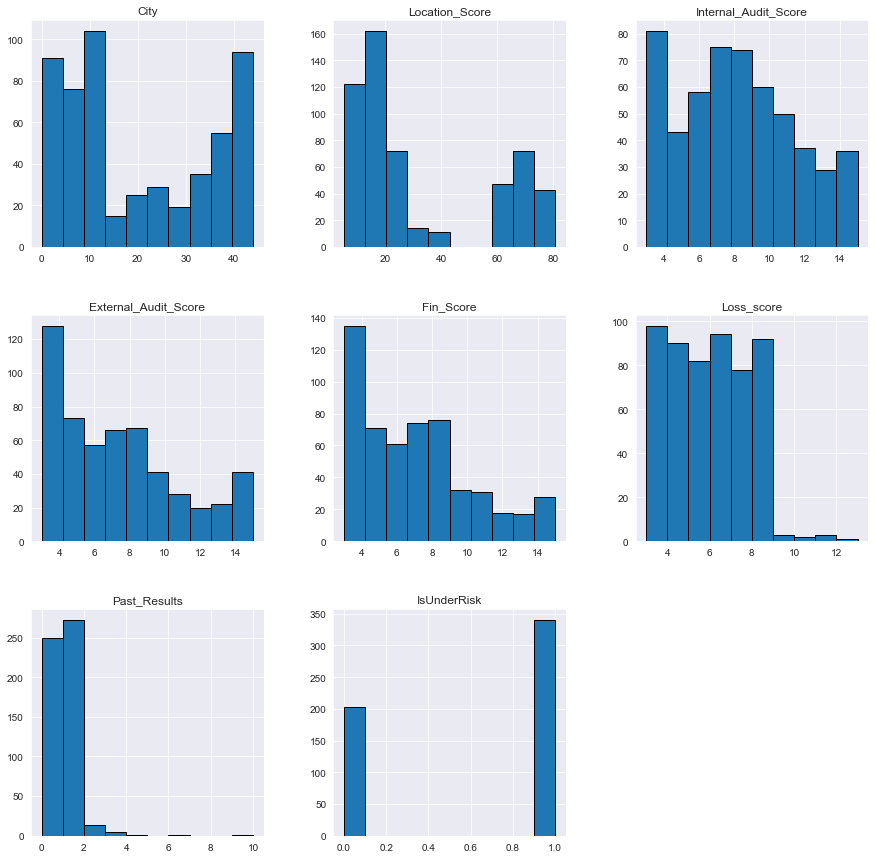

In [9]:
df.hist(edgecolor = "black" , figsize = (15 , 15));

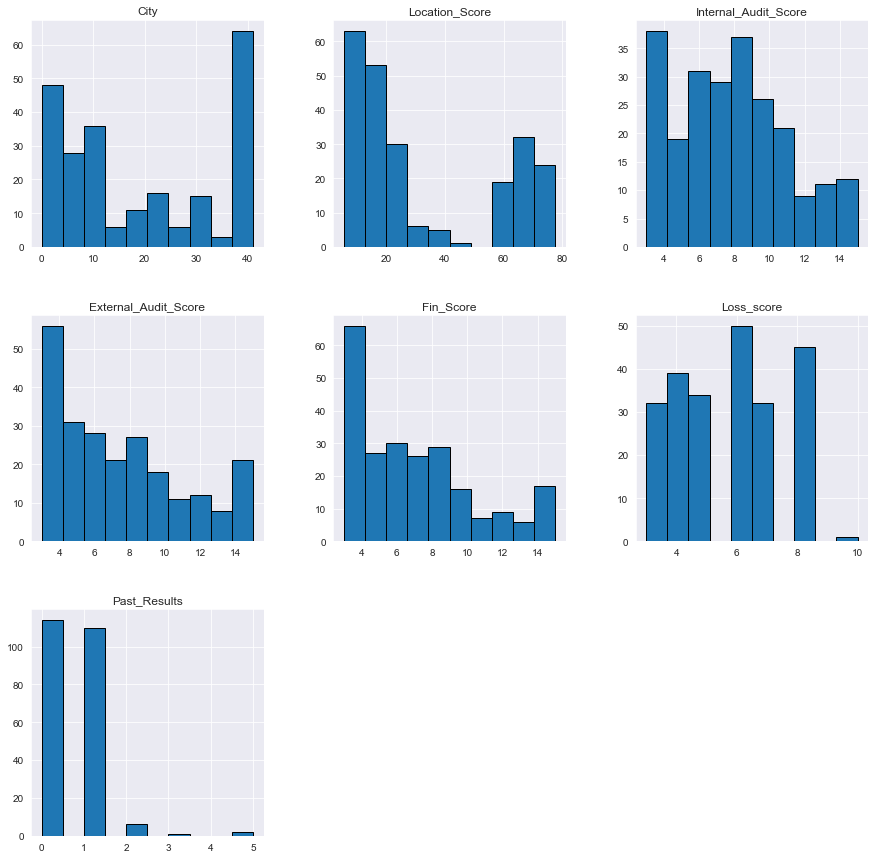

In [10]:
tt.hist(edgecolor = "black" , figsize = (15 , 15));

In [11]:
df.head()

City  Location_Score  Internal_Audit_Score  External_Audit_Score  \
0     2           8.032                    14                     8   
1    31          77.730                     8                     3   
2    40          59.203                     3                    12   
3    12          73.080                     4                     5   
4     4          15.666                    13                    15   

   Fin_Score  Loss_score  Past_Results  IsUnderRisk  
0          3           6             0            1  
1          3           8             1            0  
2         11           3             0            1  
3          7           6             0            0  
4          6           7             2            1

<AxesSubplot:>

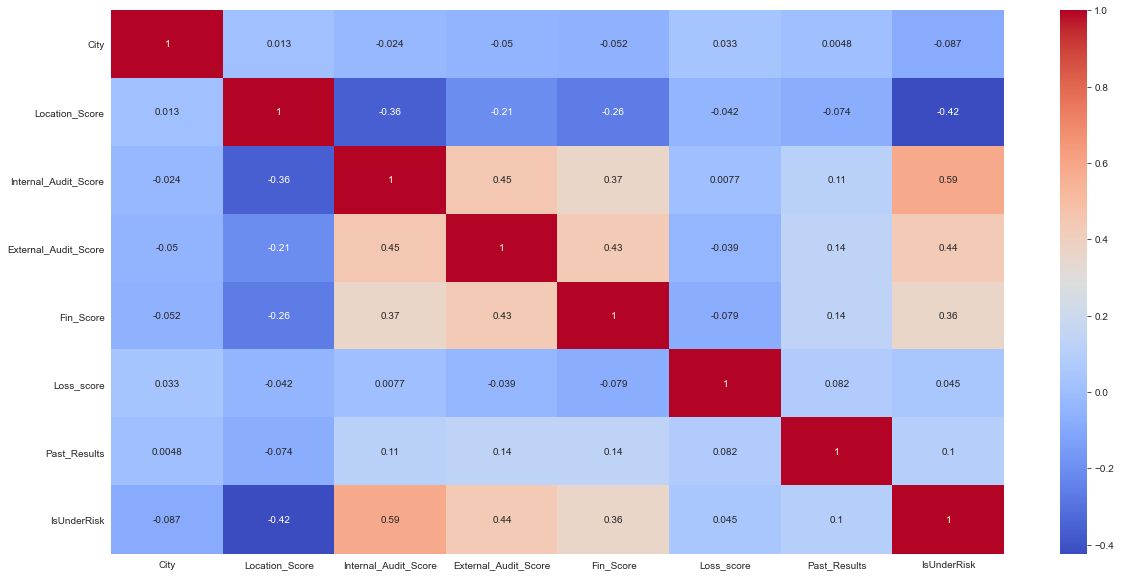

In [12]:
plt.figure(figsize = (20 , 10))
sns.heatmap(df.corr() , annot = True , cmap = "coolwarm")

In [13]:
skew = df.skew()
skew

City                    0.288191
Location_Score          0.761698
Internal_Audit_Score    0.285844
External_Audit_Score    0.671111
Fin_Score               0.778946
Loss_score              0.277448
Past_Results            4.488119
IsUnderRisk            -0.522920
dtype: float64

In [14]:
ints = tt.columns.tolist()
ints

['City',
 'Location_Score',
 'Internal_Audit_Score',
 'External_Audit_Score',
 'Fin_Score',
 'Loss_score',
 'Past_Results']

Past_Results with skewness of    4.488119468223291


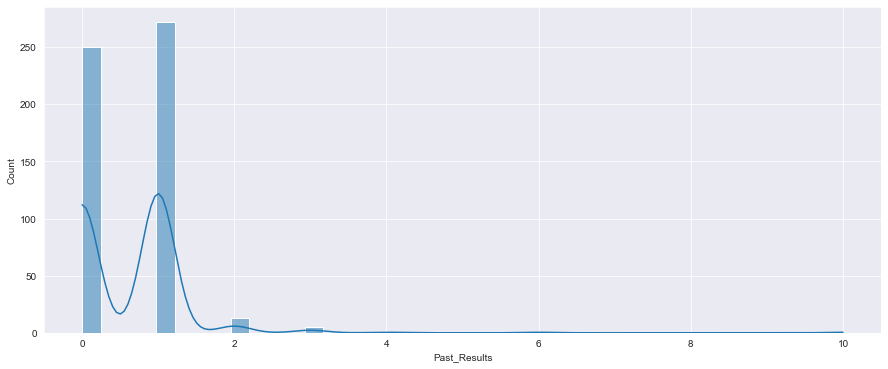

Wall time: 648 ms


In [15]:
%%time

for i in range(len(skew)):
    if skew[i] > 3 or skew[i] < -3 :
        if skew.index[i] in ints:
            print(f"{skew.index[i]} with skewness of {skew[i] : >{20}}")
            plt.figure(figsize = (15 , 6))
            sns.histplot(data = df , x = df.columns[i] , kde = True)
            plt.show()

<AxesSubplot:xlabel='Past_Results'>

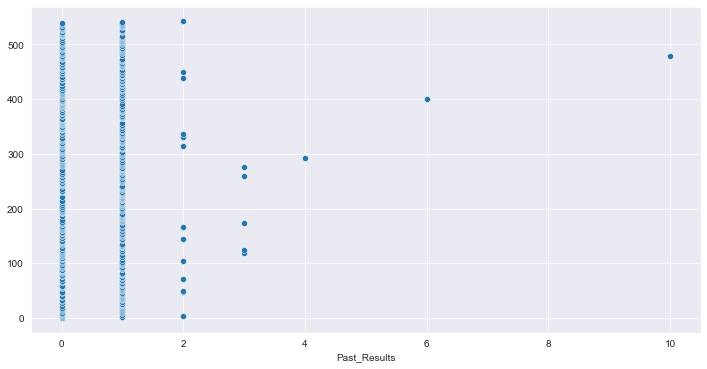

In [16]:
plt.figure(figsize = (12 , 6))
sns.scatterplot(x = df["Past_Results"] , y = df.index)

In [17]:
df["Past_Results"].loc[df["Past_Results"] > np.percentile(df["Past_Results"] , [99])[0] * 3] = np.percentile(df["Past_Results"] , [99])[0]

In [18]:
skew = df.skew()
skew

City                    0.288191
Location_Score          0.761698
Internal_Audit_Score    0.285844
External_Audit_Score    0.671111
Fin_Score               0.778946
Loss_score              0.277448
Past_Results            1.814999
IsUnderRisk            -0.522920
dtype: float64

In [19]:
for i in ints:
        df[i] = np.log(df[i] + 1)
        tt[i] = np.log(tt[i] + 1)

In [20]:
df.head()

City  Location_Score  Internal_Audit_Score  External_Audit_Score  \
0  1.098612        2.200774              2.708050              2.197225   
1  3.465736        4.366024              2.197225              1.386294   
2  3.713572        4.097722              1.386294              2.564949   
3  2.564949        4.305146              1.609438              1.791759   
4  1.609438        2.813371              2.639057              2.772589   

   Fin_Score  Loss_score  Past_Results  IsUnderRisk  
0   1.386294    1.945910      0.000000            1  
1   1.386294    2.197225      0.693147            0  
2   2.484907    1.386294      0.000000            1  
3   2.079442    1.945910      0.000000            0  
4   1.945910    2.079442      1.098612            1

In [21]:
X = df.drop(["IsUnderRisk"] , axis = 1)
y = df["IsUnderRisk"]

In [22]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 42)
len(X_train) , len(X_test) , len(y_train) , len(y_test)

(434, 109, 434, 109)

In [23]:
y_train.value_counts()

1    263
0    171
Name: IsUnderRisk, dtype: int64

In [24]:
ints

['City',
 'Location_Score',
 'Internal_Audit_Score',
 'External_Audit_Score',
 'Fin_Score',
 'Loss_score',
 'Past_Results']

In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


X_train[ints] = scaler.fit_transform(X_train[ints])
X_test[ints] = scaler.transform(X_test[ints])
tt[ints] = scaler.transform(tt[ints])

In [26]:
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix , f1_score , accuracy_score , classification_report , log_loss
from sklearn.model_selection import cross_val_score

In [27]:
models = []
models.append(("XGBClassifier", XGBClassifier(objective = "binary:logistic" , random_state = 42 , eval_metric='mlogloss')))
models.append(("CatBoostClassifier", CatBoostClassifier(random_state = 42 , verbose = 0)))
models.append(("RandomForest", RandomForestClassifier(random_state = 42 , n_estimators = 200)))
models.append(("Extra Tree Classifier", ExtraTreesClassifier(random_state = 42 , n_estimators = 200)))
models.append(("Bagging Classifier", BaggingClassifier(random_state = 42 , n_estimators = 200)))
models.append(("Gradient Boosting Classifier" , GradientBoostingClassifier(random_state = 42)))
models.append(("LightGBM" , LGBMClassifier(random_state = 42 , n_estimators = 200)))
models.append(("Logistic Regression", LogisticRegression(random_state = 42 , solver = "liblinear")))
models.append(("KNeigbors", KNeighborsClassifier()))

In [28]:
def evaluation_metrics(model , X_train , y_train , X_test , y_test , params = False):
    
    mod = model[1].fit(X_train , y_train)
    preds = model[1].predict(X_test)
    accuracies = cross_val_score(estimator = model[1], X = X_train , y = y_train, cv = 5 , scoring = "f1")
    cm = confusion_matrix(y_test , preds)
    cf = classification_report(y_test , preds)
    f1 = 100 * (f1_score(y_test , preds))
    pred = model[1].predict_proba(X_test)
    score = log_loss(y_test , pred)
    
    
    print("\n")
    print(model[0])
    
    print("\n")
    if params:
        print(f"Best Parameters are : \n" , model[1].best_params_)
        print("\n")
        
    print(f"Confusion matrix : \n")
    plt.figure(figsize = (12 , 8))
    sns.heatmap(cm, cmap = 'coolwarm', annot = True, annot_kws = {'fontsize': 20})
    plt.show()
    print("\n")
    
    print(f"Training score : {model[1].score(X_train , y_train):.4f}")
    print("\n") 
    
    print(f"Test Score : {model[1].score(X_test , y_test):.4f}")
    print("\n")
    
    print(f"K-fold accuracy : {np.mean(accuracies):.4f}")
    print("\n")
    
    print(f"Standard Deviation of Accuracies in k-fold : {np.std(accuracies):.4f}")
    print("\n")
    
    print(f"Classification report : \n\n{cf}")
    print("\n")
    
    print(f"F1 Score : {f1}")
    print("\n")
    
    print(f"Evaluation Score : {score}")
    print("\n")

    print("\n\n")
    
    sam = []
    sam.append(model[0])
    sam.append(model[1].score(X_train , y_train))
    sam.append(model[1].score(X_test , y_test))
    sam.append(np.mean(accuracies))
    sam.append(np.std(accuracies))
    sam.append(f1)
    sam.append(score)
    
    return sam , mod



XGBClassifier


Confusion matrix : 



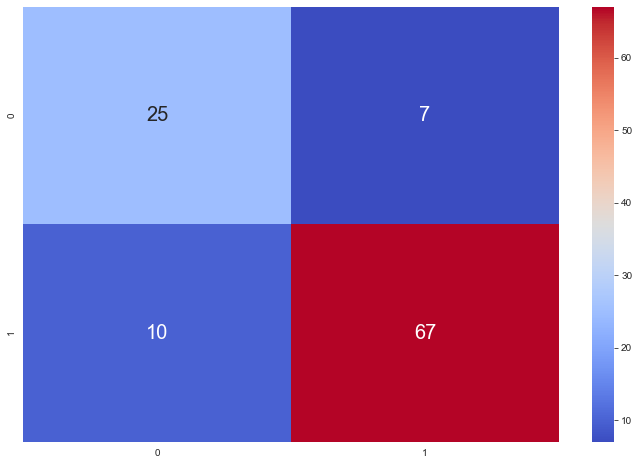



Training score : 1.0000


Test Score : 0.8440


K-fold accuracy : 0.8592


Standard Deviation of Accuracies in k-fold : 0.0328


Classification report : 

              precision    recall  f1-score   support

           0       0.71      0.78      0.75        32
           1       0.91      0.87      0.89        77

    accuracy                           0.84       109
   macro avg       0.81      0.83      0.82       109
weighted avg       0.85      0.84      0.85       109



F1 Score : 88.74172185430463


Evaluation Score : 0.436099509345453







CatBoostClassifier


Confusion matrix : 



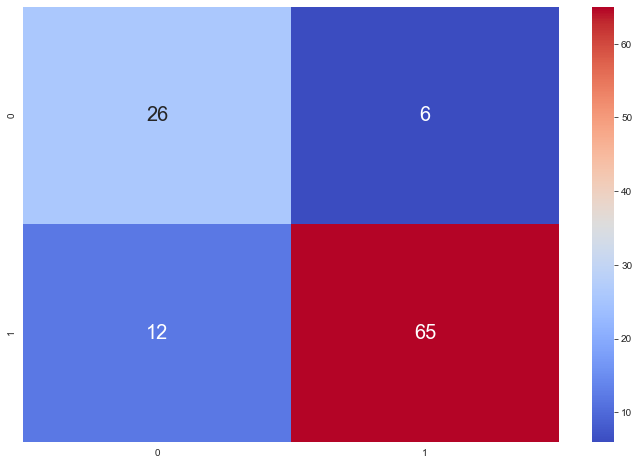



Training score : 0.9839


Test Score : 0.8349


K-fold accuracy : 0.8683


Standard Deviation of Accuracies in k-fold : 0.0512


Classification report : 

              precision    recall  f1-score   support

           0       0.68      0.81      0.74        32
           1       0.92      0.84      0.88        77

    accuracy                           0.83       109
   macro avg       0.80      0.83      0.81       109
weighted avg       0.85      0.83      0.84       109



F1 Score : 87.83783783783784


Evaluation Score : 0.2900148939576182







RandomForest


Confusion matrix : 



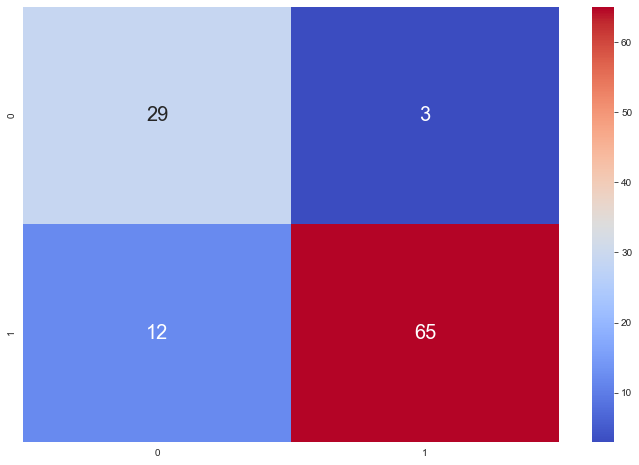



Training score : 1.0000


Test Score : 0.8624


K-fold accuracy : 0.8725


Standard Deviation of Accuracies in k-fold : 0.0497


Classification report : 

              precision    recall  f1-score   support

           0       0.71      0.91      0.79        32
           1       0.96      0.84      0.90        77

    accuracy                           0.86       109
   macro avg       0.83      0.88      0.85       109
weighted avg       0.88      0.86      0.87       109



F1 Score : 89.6551724137931


Evaluation Score : 0.2818203100294666







Extra Tree Classifier


Confusion matrix : 



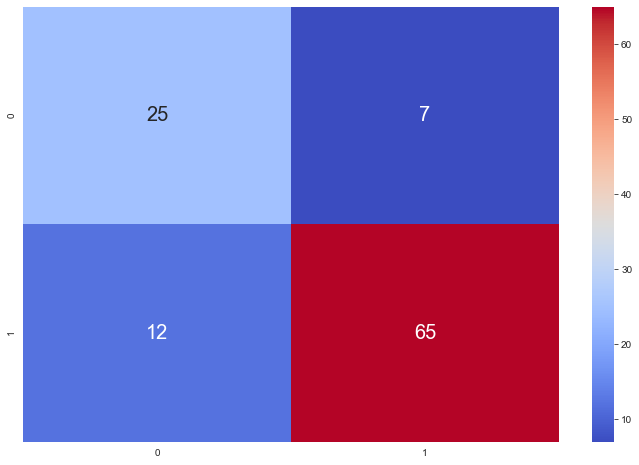



Training score : 1.0000


Test Score : 0.8257


K-fold accuracy : 0.8794


Standard Deviation of Accuracies in k-fold : 0.0351


Classification report : 

              precision    recall  f1-score   support

           0       0.68      0.78      0.72        32
           1       0.90      0.84      0.87        77

    accuracy                           0.83       109
   macro avg       0.79      0.81      0.80       109
weighted avg       0.84      0.83      0.83       109



F1 Score : 87.24832214765101


Evaluation Score : 0.3414247522912851







Bagging Classifier


Confusion matrix : 



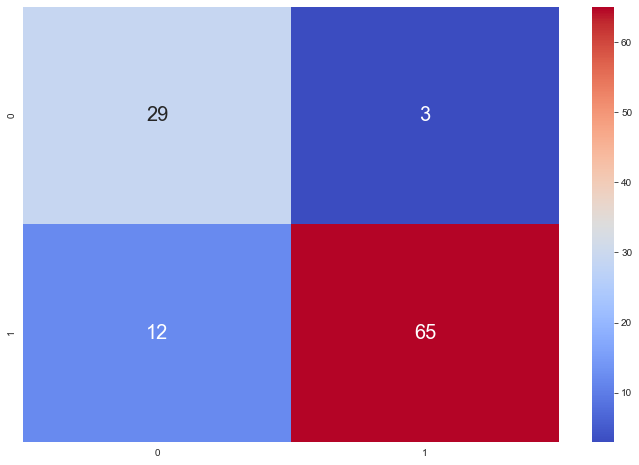



Training score : 1.0000


Test Score : 0.8624


K-fold accuracy : 0.8617


Standard Deviation of Accuracies in k-fold : 0.0425


Classification report : 

              precision    recall  f1-score   support

           0       0.71      0.91      0.79        32
           1       0.96      0.84      0.90        77

    accuracy                           0.86       109
   macro avg       0.83      0.88      0.85       109
weighted avg       0.88      0.86      0.87       109



F1 Score : 89.6551724137931


Evaluation Score : 0.28274688906782064







Gradient Boosting Classifier


Confusion matrix : 



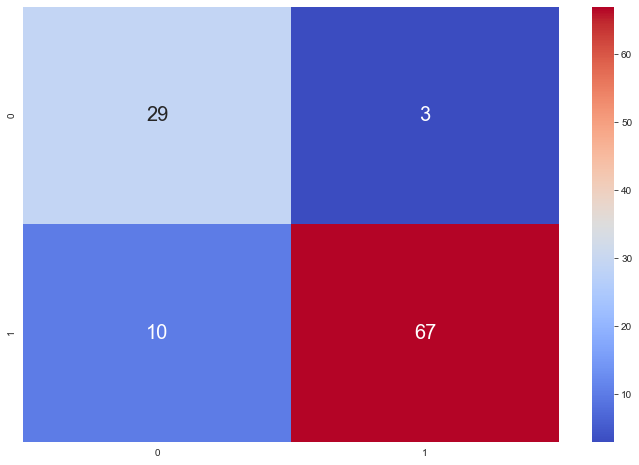



Training score : 0.9677


Test Score : 0.8807


K-fold accuracy : 0.8716


Standard Deviation of Accuracies in k-fold : 0.0432


Classification report : 

              precision    recall  f1-score   support

           0       0.74      0.91      0.82        32
           1       0.96      0.87      0.91        77

    accuracy                           0.88       109
   macro avg       0.85      0.89      0.86       109
weighted avg       0.89      0.88      0.88       109



F1 Score : 91.15646258503402


Evaluation Score : 0.24699545851768057







LightGBM


Confusion matrix : 



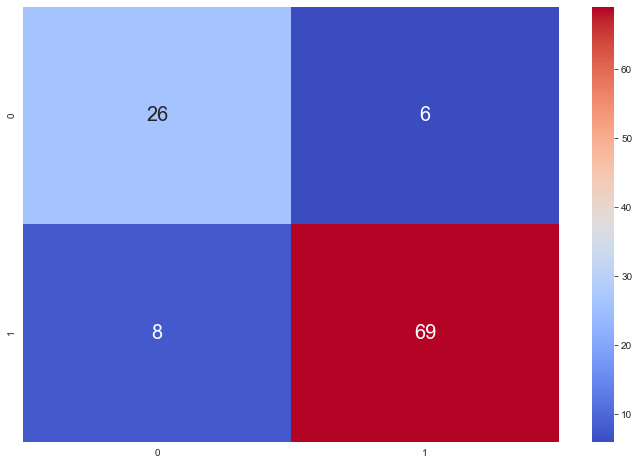



Training score : 1.0000


Test Score : 0.8716


K-fold accuracy : 0.8670


Standard Deviation of Accuracies in k-fold : 0.0362


Classification report : 

              precision    recall  f1-score   support

           0       0.76      0.81      0.79        32
           1       0.92      0.90      0.91        77

    accuracy                           0.87       109
   macro avg       0.84      0.85      0.85       109
weighted avg       0.87      0.87      0.87       109



F1 Score : 90.78947368421053


Evaluation Score : 0.44550671694799054







Logistic Regression


Confusion matrix : 



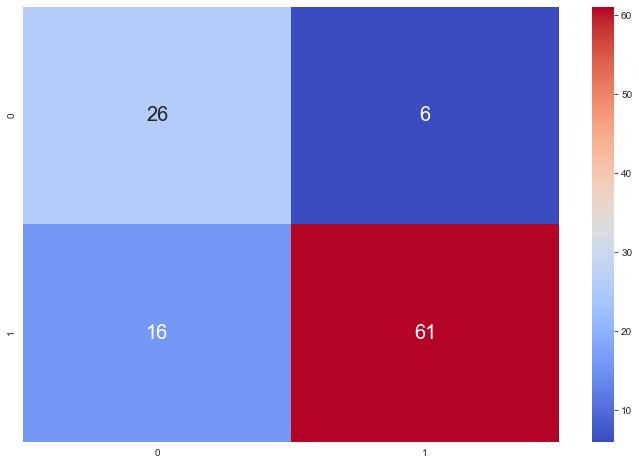



Training score : 0.8226


Test Score : 0.7982


K-fold accuracy : 0.8441


Standard Deviation of Accuracies in k-fold : 0.0428


Classification report : 

              precision    recall  f1-score   support

           0       0.62      0.81      0.70        32
           1       0.91      0.79      0.85        77

    accuracy                           0.80       109
   macro avg       0.76      0.80      0.77       109
weighted avg       0.82      0.80      0.80       109



F1 Score : 84.72222222222221


Evaluation Score : 0.3912552211625471







KNeigbors


Confusion matrix : 



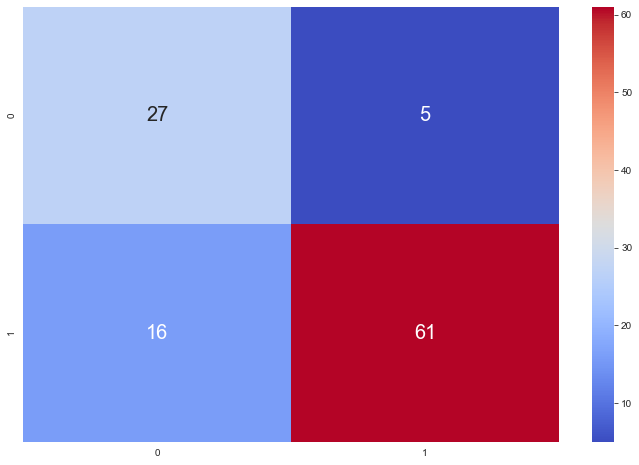



Training score : 0.8594


Test Score : 0.8073


K-fold accuracy : 0.8142


Standard Deviation of Accuracies in k-fold : 0.0383


Classification report : 

              precision    recall  f1-score   support

           0       0.63      0.84      0.72        32
           1       0.92      0.79      0.85        77

    accuracy                           0.81       109
   macro avg       0.78      0.82      0.79       109
weighted avg       0.84      0.81      0.81       109



F1 Score : 85.31468531468532


Evaluation Score : 1.2947947798235613





Wall time: 51.8 s


In [29]:
%%time

pre_final = []

for i in models:
    sam = evaluation_metrics(i , X_train , y_train , X_test , y_test)
    pre_final.append(sam)

In [30]:
data_pre_final = [x[0] for x in pre_final]

In [31]:
me = pd.DataFrame(data_pre_final , columns = ["Model" , "Train Score" , "Test Score" , "K-fold Accuracy" , "K-fold Std" , "F1 Score" , "Evaluation_Score"])

me.sort_values(by = ["Evaluation_Score" , "F1 Score" , "K-fold Std" , "K-fold Accuracy" , "Test Score" , "Train Score"] , inplace = True , ascending = [True , False , True , False , False , False])
me = me.reset_index(drop = True)
me

Model  Train Score  Test Score  K-fold Accuracy  \
0  Gradient Boosting Classifier     0.967742    0.880734         0.871610   
1                  RandomForest     1.000000    0.862385         0.872486   
2            Bagging Classifier     1.000000    0.862385         0.861730   
3            CatBoostClassifier     0.983871    0.834862         0.868325   
4         Extra Tree Classifier     1.000000    0.825688         0.879391   
5           Logistic Regression     0.822581    0.798165         0.844098   
6                 XGBClassifier     1.000000    0.844037         0.859175   
7                      LightGBM     1.000000    0.871560         0.866999   
8                     KNeigbors     0.859447    0.807339         0.814172   

   K-fold Std   F1 Score  Evaluation_Score  
0    0.043200  91.156463          0.246995  
1    0.049734  89.655172          0.281820  
2    0.042474  89.655172          0.282747  
3    0.051246  87.837838          0.290015  
4    0.035085  87.248322          0.341425  
5    0.042847  84.722222          0.391255  
6    0.032781  88.741722          0.436100  
7    0.036209  90.789474          0.445507  
8    0.038277  85.314685          1.294795

### WIthout Any Preprecessing Steps

In [31]:
me = pd.DataFrame(data_pre_final , columns = ["Model" , "Train Score" , "Test Score" , "K-fold Accuracy" , "K-fold Std" , "F1 Score" , "Evaluation_Score"])

me.sort_values(by = ["Evaluation_Score" , "F1 Score" , "K-fold Std" , "K-fold Accuracy" , "Test Score" , "Train Score"] , inplace = True , ascending = [True , False , True , False , False , False])
me = me.reset_index(drop = True)
me

Model  Train Score  Test Score  K-fold Accuracy  \
0  Gradient Boosting Classifier     0.967742    0.880734         0.846312   
1                  RandomForest     1.000000    0.862385         0.856134   
2            Bagging Classifier     1.000000    0.862385         0.837520   
3            CatBoostClassifier     0.983871    0.834862         0.849242   
4         Extra Tree Classifier     1.000000    0.825688         0.860537   
5           Logistic Regression     0.836406    0.798165         0.824676   
6                 XGBClassifier     1.000000    0.844037         0.832216   
7                      LightGBM     1.000000    0.871560         0.841238   
8                     KNeigbors     0.873272    0.761468         0.821467   

   K-fold Std   F1 Score  Evaluation_Score  
0    0.045451  88.377359          0.237268  
1    0.055113  86.659762          0.284005  
2    0.041466  86.659762          0.285393  
3    0.054724  83.859233          0.289749  
4    0.046784  82.907903          0.332117  
5    0.050668  80.384846          0.363228  
6    0.034906  84.597911          0.436098  
7    0.041256  87.266070          0.445507  
8    0.046918  77.022055          1.289962

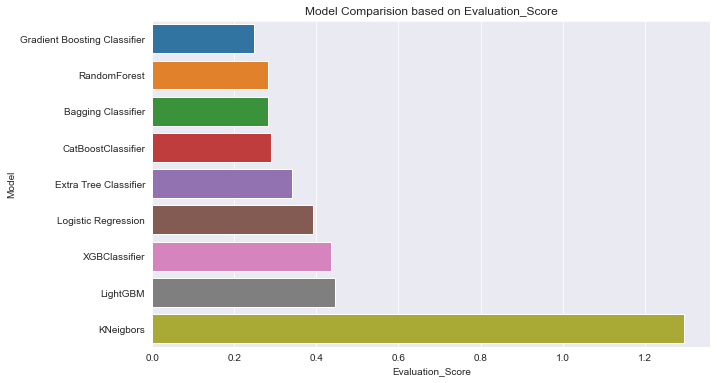

In [32]:
plt.figure(figsize = (10 , 6))
sns.barplot(y = "Model" , x = "Evaluation_Score" , data = me)
plt.title("Model Comparision based on Evaluation_Score");

In [33]:
grad = pre_final[5][1]
grad

GradientBoostingClassifier(random_state=42)

In [34]:
def feature_importance(model , X_train , y_train):
    features = model.feature_importances_
    temp = pd.DataFrame(list(zip(features , X_train.columns)) , columns = ["Feature Importances" , "Feartures"]).sort_values(by = ["Feature Importances"] , ascending = False).reset_index(drop = True)
    plt.figure(figsize = (15 , 15))
    sns.set(font_scale = 1)
    sns.barplot(data = temp , y = "Feartures" , x = "Feature Importances")
    plt.show()
    return temp

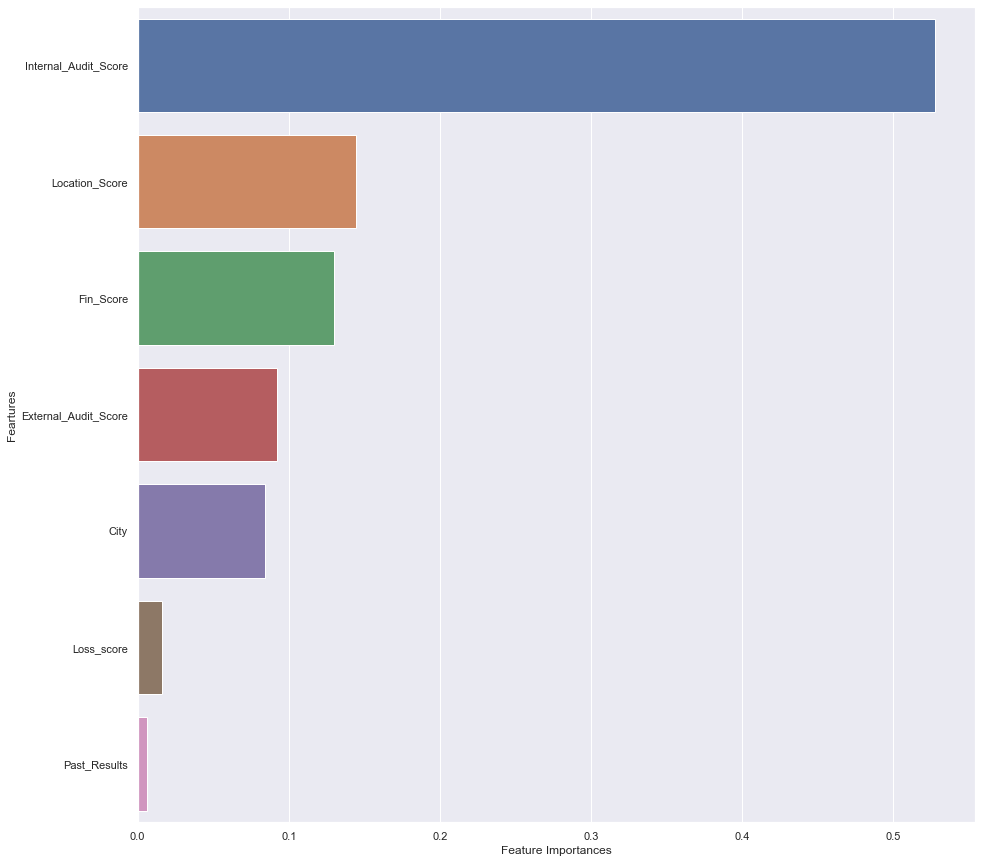

In [35]:
grad_df = feature_importance(grad , X_train , y_train)

In [36]:
final_grad = pd.DataFrame(grad.predict_proba(tt) , columns = [0 , 1])
final_grad

0         1
0    0.008555  0.991445
1    0.130634  0.869366
2    0.946648  0.053352
3    0.005715  0.994285
4    0.177542  0.822458
..        ...       ...
228  0.906074  0.093926
229  0.327354  0.672646
230  0.616783  0.383217
231  0.003921  0.996079
232  0.935940  0.064060

[233 rows x 2 columns]

In [37]:
final_grad.to_csv("Gradient_2.csv" , index = False)